<a href="https://colab.research.google.com/github/nihalhabeeb/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the datasets
restaurant_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Unsupervised ML-Nihal Habeeb/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Unsupervised ML-Nihal Habeeb/Zomato Restaurant reviews.csv')

### Dataset insights

#### Rastaurant Names and Metadata

In [4]:
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


There are null values in the collections columns.

In [6]:
# number of unique values in each column
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

#### Reviews data

In [7]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [9]:
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

There are some null values in most columns.

In [10]:
reviews_df.shape

(10000, 7)

In [11]:
# number of unique values in the columns
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

### Data Preprocessing

We can see the cost column contains the commas within the price value and it is string datatype. We can remove the commas and convert them into float datatype.

#### Rastaurant Names and Metadata

In [12]:
restaurant_df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [13]:
restaurant_df['Cost'][5]

'1,500'

In [14]:
type(restaurant_df['Cost'][5])

str

In [15]:
# replacing "," with "" (effectively removing commas) and converting the datatype to float
restaurant_df['Cost'] = restaurant_df['Cost'].str.replace(",","").astype('float64')

We will remove Links and Timings columns as they won't be used for the analysis.

In [16]:
# dropping columns
restaurant_df.drop(['Links','Timings'],axis=1,inplace=True)

The reviews dataset has the name of restaurants in "Restaurant" column. We will rename the column in this dataset as well.

In [17]:
restaurant_df.rename(columns={'Name':'Restaurant'},inplace=True)

In [18]:
restaurant_df.head(5)

,Restaurant,Cost,Collections,Cuisines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


#### Reviews dataset

In [19]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [20]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

We can see there is one value in the Rating column 'Like' which doesn't give any specific score. We can remove it.

In [21]:
# the row where Rating contains 'Like' value
reviews_df[reviews_df['Rating'] == 'Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [22]:
# dropping that row
reviews_df.drop(7601, axis = 0, inplace = True)

The Rating column values are string datatype. We can convert them into float.

In [23]:
type(reviews_df['Rating'][0])

str

In [24]:
# converting to float
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')

The time column is in string format as well. We can convert them into datetime.

In [25]:
type(reviews_df['Time'][0])

str

In [26]:
# converting to datetime
import datetime
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

In [27]:
reviews_df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0


### Handling Null Values

#### Restaurant data

In [28]:
# missing value percentage
(restaurant_df.isna().sum()/len(restaurant_df))*100

Restaurant      0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
dtype: float64

The collection has more than 51 % missing values. The collection column describes the restaurant with Zomato's categories. The missing values can be replaced with "Unknown".

In [29]:
# Replacing null values
restaurant_df['Collections'].fillna('Unknown',inplace=True)

#### Reviews data

In [30]:
# missing value percentage
(reviews_df.isna().sum()/len(reviews_df))*100

Restaurant    0.000000
Reviewer      0.380038
Review        0.450045
Rating        0.380038
Metadata      0.380038
Time          0.380038
Pictures      0.000000
dtype: float64

The percentage of missing values is negligible and those rows can be simply dropped.

In [31]:
# Dropping the rows with missing values
reviews_df.dropna(inplace=True)

### Outlier Treatment

In [32]:
def remove_outlier(df,column):
  '''
  Remove outliers in the distribution. Scale the distribution to the standard normal distribution and remove
  every data points that are beyond 3 standard deviations (outliers). Boxplots and Distplots of the distribution
  is constructed before and after the outlier treatment.
  '''
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before outlier treatment')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  # remove datapoints that are at or beyond 3 standard dev to the right
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  # remove datapoints that are at or beyond 3 standard dev to the left (negative)
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('After outlier treatment')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  return df

#### Restaurant dataset

There's only one numerical column in Restaurant dataset. We can scale it to standard normal distribution (z-distribution) and consider every data beyond 3 standard deviation as outliers using the function defined above.

In [33]:
restaurant_df.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [34]:
# some outliers
restaurant_df[((restaurant_df['Cost'] - restaurant_df['Cost'].mean()) / restaurant_df['Cost'].std()).abs() > 3]

,Restaurant,Cost,Collections,Cuisines
56,Feast - Sheraton Hyderabad Hotel,2500.0,"Sunday Brunches, Great Breakfasts, Function Ve...","Modern Indian, Asian, Continental, Italian"
92,Collage - Hyatt Hyderabad Gachibowli,2800.0,Sunday Brunches,"Continental, Italian, North Indian, Chinese, A..."


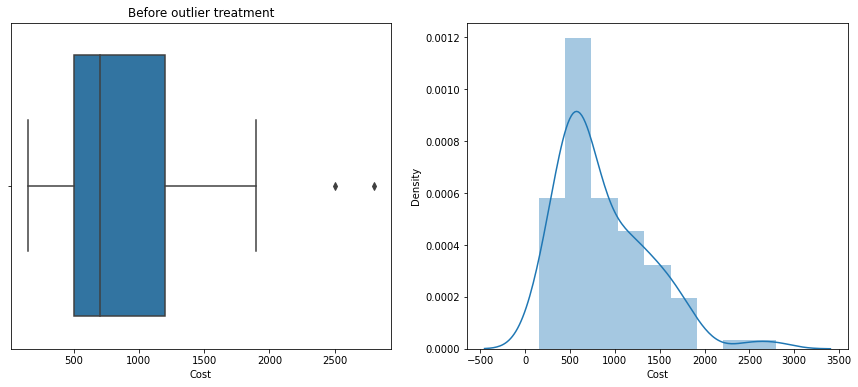

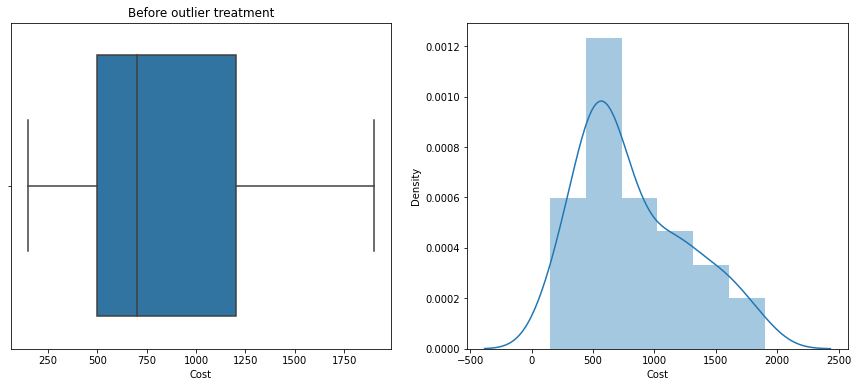

In [35]:
# removing outlier
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Before outlier treatment')
sns.boxplot(restaurant_df['Cost'])
plt.subplot(1, 2, 2)
sns.distplot(restaurant_df['Cost'])

# remove datapoints that are at or beyond 3 standard dev to the right
restaurant_df = restaurant_df[((restaurant_df['Cost'] - restaurant_df['Cost'].mean()) / restaurant_df['Cost'].std()).abs() < 3]
# remove datapoints that are at or beyond 3 standard dev to the left (negative)
restaurant_df = restaurant_df[((restaurant_df['Cost'] - restaurant_df['Cost'].mean()) / restaurant_df['Cost'].std()).abs() > -3]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Before outlier treatment')
sns.boxplot(restaurant_df['Cost'])
plt.subplot(1, 2, 2)
sns.distplot(restaurant_df['Cost'])

In [36]:
restaurant_df[((restaurant_df['Cost'] - restaurant_df['Cost'].mean()) / restaurant_df['Cost'].std()).abs() > 3]

,Restaurant,Cost,Collections,Cuisines


In [37]:
restaurant_df.shape

(103, 4)

#### Reviews dataset

In [38]:
reviews_df.describe()

,Rating,Pictures
count,9954.000000,9954.000000
mean,3.600261,0.751959
std,1.483573,2.575819
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


There are two numerical columns in this dataset.

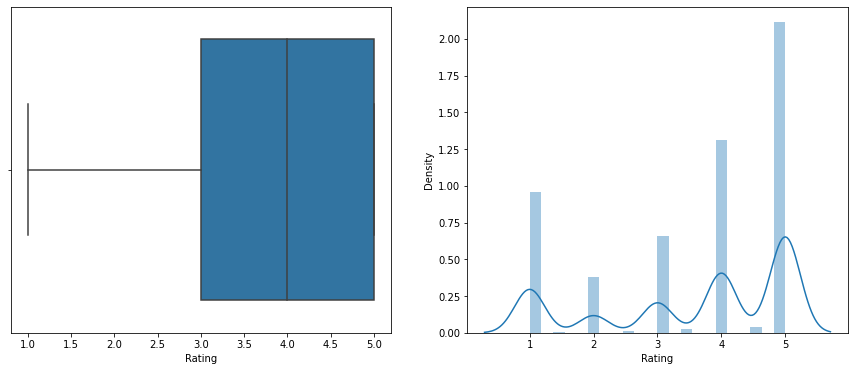

In [39]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
# plt.title('Before outlier treatment')
sns.boxplot(reviews_df['Rating'])
plt.subplot(1, 2, 2)
sns.distplot(reviews_df['Rating'])

The ratings column doesn't have any outliers.

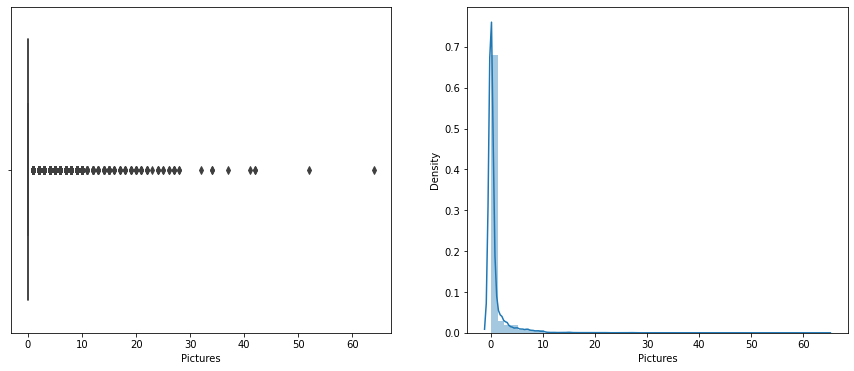

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
# plt.title('Before outlier treatment')
sns.boxplot(reviews_df['Pictures'])
plt.subplot(1, 2, 2)
sns.distplot(reviews_df['Pictures'])

In [41]:
reviews_df[((reviews_df['Pictures'] - reviews_df['Pictures'].mean()) / reviews_df['Pictures'].std()).abs() > 3].shape

(177, 7)

The pictures column has a lot of "outliers" but we don't want to remove a lot of data simply because they contained "unusual" number of pictures. So we decide to not remove those data.

#### Making list of cuisines and their count

In [42]:
# new column
restaurant_df['Cuisines_list'] = pd.Series()
# split the cuisines to list
list_of_cuisines = restaurant_df.Cuisines.str.split(', ')
# add the list to the new column
restaurant_df['Cuisines_list'] = list_of_cuisines

In [43]:
# column for the total number of cusines served by restaurant
restaurant_df['Total Cuisines'] = restaurant_df['Cuisines_list'].apply(lambda x : len(x))

In [44]:
restaurant_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3


### Text processing in restaurant data

#### Removing stopwords and punctuation

In [45]:
# to remove stopwords 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Note:** We replaced missing values with "Unknown".

In [46]:
# # include unknown in stop words
# sw.append('unknown')
# # last word in stop words list
# sw[-1]

In [47]:
def remove_stopwords(text):
  '''Remove stopwords from input text'''
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

#remove punctuation
def remove_punctuation(text):
  '''Remove punctuation from input text'''
  import string
  # replacing the punctuations with '' (which effectively removes them)
  translator = str.maketrans('', '', string.punctuation)
  # return the text wihtout punctuation
  return text.translate(translator)

# create an object of stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''Stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

#### Collections column

In [48]:
restaurant_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3


In [49]:
# remove punctuation and stopwords from collections column
restaurant_df['Collections'] = restaurant_df['Collections'].apply(remove_punctuation)
restaurant_df['Collections'] = restaurant_df['Collections'].apply(remove_stopwords)
restaurant_df['Collections'] = restaurant_df['Collections'].apply(stemming)

In [50]:
# # # remove punctuation and stopwords from cuisines column
# restaurant_df['Cuisines'] = restaurant_df['Cuisines'].apply(remove_punctuation)
# restaurant_df['Cuisines'] = restaurant_df['Cuisines'].apply(remove_stopwords)

We are applying text processing on both collections and cuisines columns separately because we want to calculate their lengths separately.

We are making a single column for both collections and cuisines so that TF-IDF vectorization can be applied on them together.

#### TF-IDF vectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfid vectorizer object
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
# tfid_vectorizer.fit(restaurant_df['Collections'])   
tfidf_matrix = tfid_vectorizer.fit_transform(restaurant_df['Collections'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [52]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

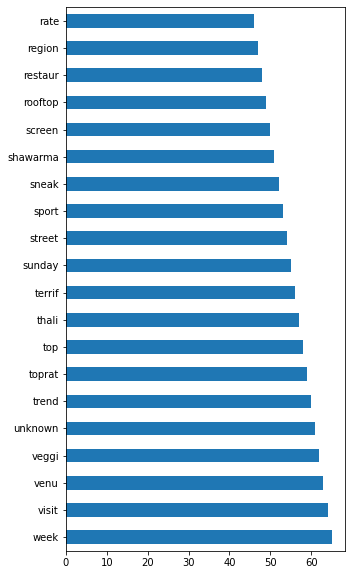

In [53]:
vocab_after_stem.head(20).plot(kind = 'barh', figsize = (5,10))

In [54]:
# feature_names = tfid_vectorizer.get_feature_names()

# text_vectorized_df = pd.DataFrame(tfidf_matrix.todense(), columns = feature_names)
# text_vectorized_df

**Counting the number of words in collections**

In [55]:
def length(text):
  '''
  Count the number of words in the input text
  '''
  count = 0
  for i in range(len(text)):
    if text[i] == ' ':
        count = count + 1
        
  return count+1

In [56]:
restaurant_df['Collections_length'] = restaurant_df['Collections'].apply(length)

In [57]:
restaurant_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2


### Reviews dataframe processing

In [58]:
# Number of reviews and followers can be separately retrieved from metadata column
reviews_df['no_of_reviews'], reviews_df['no_of_followers'] = reviews_df['Metadata'].str.split(',').str
reviews_df['no_of_reviews'] = pd.to_numeric(reviews_df['no_of_reviews'].str.split(' ').str[0])
reviews_df['no_of_followers'] = pd.to_numeric(reviews_df['no_of_followers'].str.split(' ').str[1])

In [59]:
# converting both columns to float
reviews_df['no_of_reviews'] = reviews_df['no_of_reviews'].astype('float64')
reviews_df['no_of_followers'] = reviews_df['no_of_followers'].astype('float64')

In [60]:
# extracting date and hour from the 'Time' column
reviews_df['Date'] = pd.DatetimeIndex(reviews_df['Time']).date
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [61]:
# extracting weekday,month and year from Date column
reviews_df['weekday'] = reviews_df['Date'].apply(lambda x: x.weekday())
reviews_df['month']=reviews_df['Date'].apply(lambda x: x.month)
reviews_df['year'] = reviews_df['Date'].apply(lambda x: x.year)

In [62]:
# converting weekdays to their names
week_day=  {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
reviews_df['weekday'] = reviews_df['weekday'].map(week_day)
#months
month_dict = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
reviews_df['month'] = reviews_df['month'].map(month_dict)

In [63]:
# Dropping the metadata and time as the required info is retrieved
reviews_df = reviews_df.drop(['Metadata'], axis =1)
reviews_df = reviews_df.drop(['Time'], axis =1)

In [64]:
reviews_df.head(2)

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3.0,2.0,2019-05-25,14,Saturday,May,2019


### EDA

#### Restaurant dataset

**Count of cuisines**

In [65]:
cuisines_dict = {}
for lists in restaurant_df['Cuisines_list']: 
  for name in lists:
      if (name in cuisines_dict):
          cuisines_dict[name]+=1
      else:  
          cuisines_dict[name]=1 

cuisines_df = pd.DataFrame(cuisines_dict.values(), cuisines_dict.keys(),columns = {'cuisines_counts'}).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True) 
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)
cuisines_df.head(10)

,cuisines_name,cuisines_counts
5,North Indian,60
0,Chinese,42
1,Continental,19
6,Biryani,16
18,Fast Food,15
7,Asian,13
9,Desserts,13
20,Italian,12
4,South Indian,9
29,Bakery,7


Text(0, 0.5, 'Total count of cuisines (in all restaurants)')

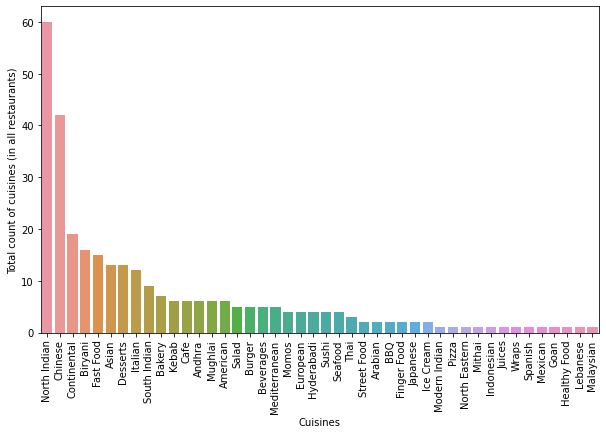

In [66]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Total count of cuisines (in all restaurants)')

We can see North Indian is the most common cuisine followed by Chinese and Continental. Malaysian is the least common.

**Count of collections in all restaurants**

In [67]:
collection_list_df = restaurant_df.Collections.str.split(' ')

collection_dict = {} 
for lists in collection_list_df: 
    for name in lists:
        if (name in collection_dict):
            collection_dict[name]+=1
        else:  
            collection_dict[name]=1 
collections_df = pd.DataFrame(collection_dict.values(), collection_dict.keys(),columns = {'collection_counts'}).reset_index()
collections_df.sort_values(by = 'collection_counts',ascending = False,inplace = True) 
collections_df.rename(columns={'index':'collection_name', 'collection_name':'collection_counts'},inplace=True)
collections_df.head(10)

,collection_name,collection_counts
23,unknown,54
4,hyderabad,17
7,great,13
8,buffet,11
3,restaur,10
0,food,9
2,rate,8
1,hygien,8
12,live,7
18,best,7


Text(0, 0.5, 'count of collections')

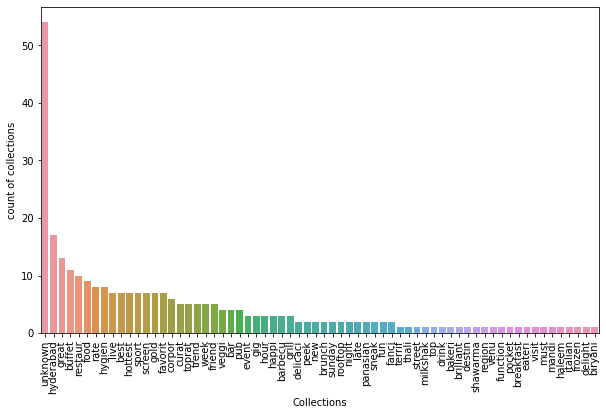

In [68]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=collections_df, x='collection_name', y= 'collection_counts')
plt.xlabel('Collections')
plt.xticks(rotation=90)
plt.ylabel('count of collections')

Most of the collection info is missing which we replaced with Unknown earlier.

**Comparison of collection and cuisine with cost**

In [69]:
# making a new df copy for this comparison
cost_df = restaurant_df.copy()

In [70]:
restaurant_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2


In [71]:
# taking the required columns
cost_comparison_df = restaurant_df[['Collections_length','Total Cuisines','Cost']]

# we need to scale them as Cost is at a different scale in comparison to others
scaler = MinMaxScaler()
scaled = scaler.fit_transform(cost_comparison_df)

# print(scaled)
cost_df['collection_length_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
cost_df['cuisines_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
cost_df['cost_scaled'] = pd.Series(scaled[i][2] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

In [72]:
# new dataframes for top collection and top cuisines
collection_df = cost_df.sort_values(['Collections_length'],ascending=False) # sorted by collection lenght
cuisines_df = cost_df.sort_values(['Total Cuisines'],ascending=False) # sorted by cuisines length

Text(0.5, 1.0, 'Restaurant sorted with number of cuisines wrt cost')

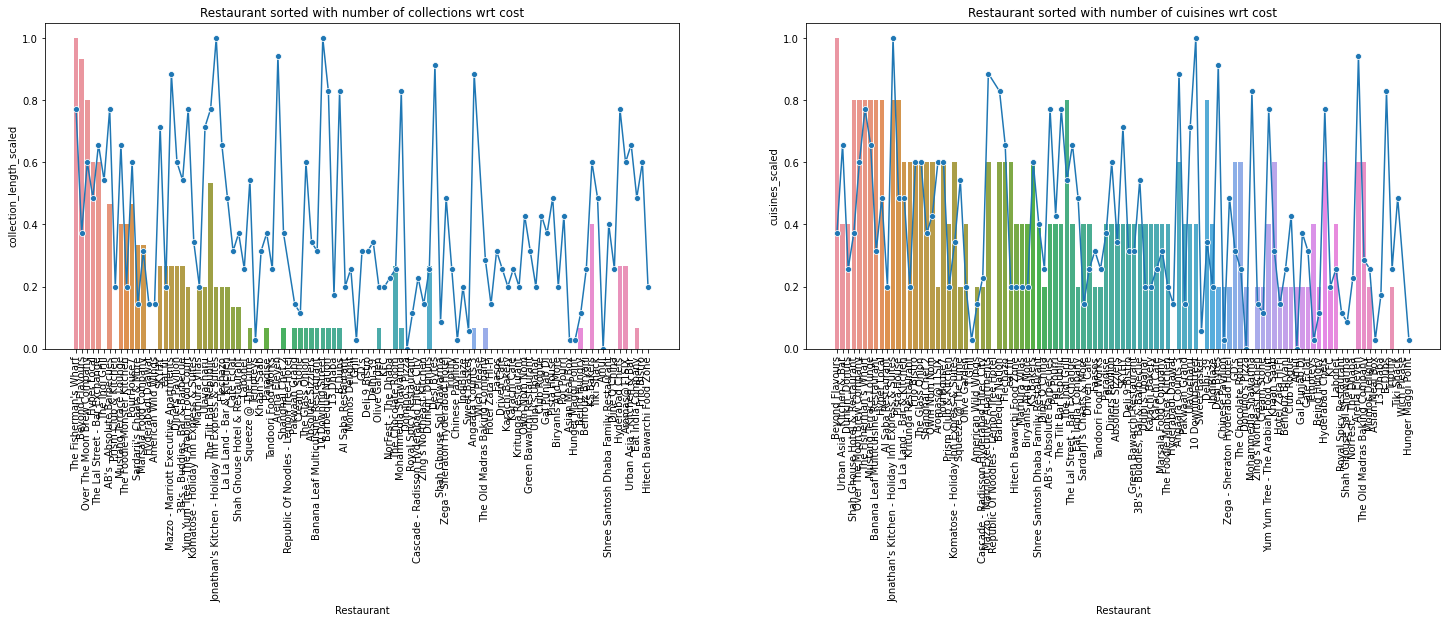

In [73]:
plt.figure(figsize=(25,6))

plt.subplot(1, 2, 1)
# collection and cost comparison plot
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='collection_length_scaled',data = collection_df)
sns.lineplot(x='Restaurant',y='cost_scaled',data= collection_df,marker='o')
plt.title('Restaurant sorted with number of collections wrt cost')

plt.subplot(1, 2, 2)
# cuisine and cost comparison plot
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='cuisines_scaled',data = cuisines_df )
sns.lineplot(x='Restaurant',y='cost_scaled',data= cuisines_df,marker='o')
plt.title('Restaurant sorted with number of cuisines wrt cost')

**Average cost of each restaurant**

In [74]:
# get the average cost at each restaurant and sort them in descending order
cost_at_restaurants = restaurant_df.groupby(['Restaurant'])['Cost'].mean().sort_values(ascending=False).reset_index()
cost_at_restaurants.head(10)

,Restaurant,Cost
0,10 Downing Street,1900.0
1,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
2,Cascade - Radisson Hyderabad Hitec City,1800.0
3,Zega - Sheraton Hyderabad Hotel,1750.0
4,Mazzo - Marriott Executive Apartments,1700.0
5,Republic Of Noodles - Lemon Tree Hotel,1700.0
6,Arena Eleven,1600.0
7,B-Dubs,1600.0
8,Barbeque Nation,1600.0
9,The Tilt Bar Republic,1500.0


Text(0, 0.5, 'Cost')

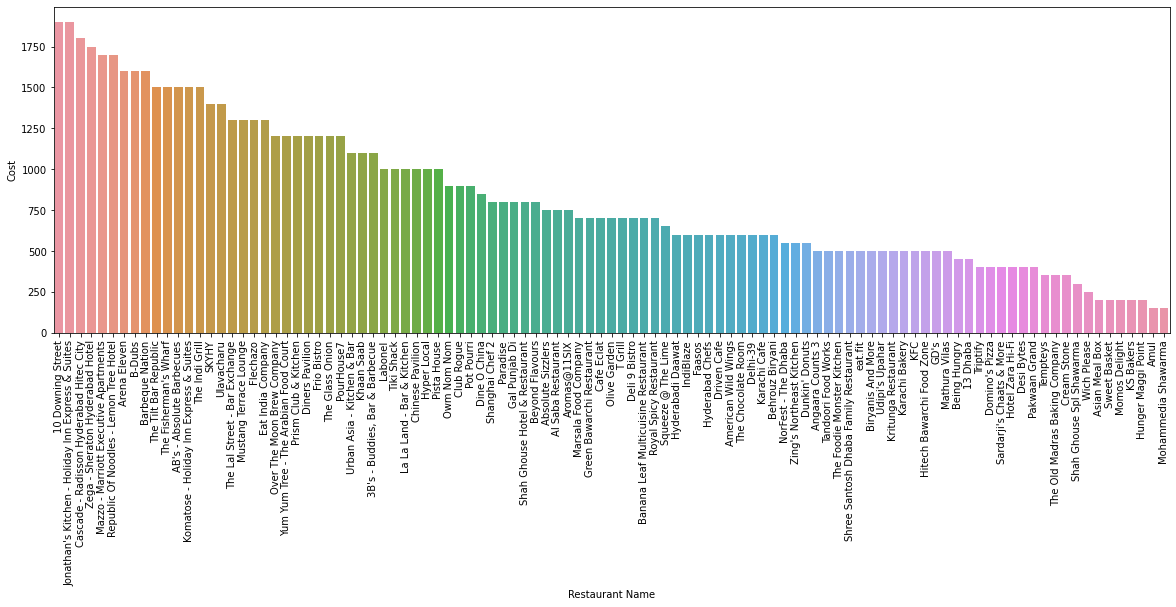

In [75]:
fig = plt.figure(figsize=[20,6])
sns.barplot(data=cost_at_restaurants, x='Restaurant', y= 'Cost')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')

**Comparison with ratings and price**

In [76]:
reviews_df.head(2)

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3.0,2.0,2019-05-25,14,Saturday,May,2019


In [77]:
# average rating of each restaurant sorted in descending order
top_restaurants_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
top_restaurants_rating.head()

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.88
1,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
3,Paradise,4.70
4,Flechazo,4.66


In [78]:
# merging restaurant avg cost df and restaurant avg rating df (sorted by rating)
restaurants_cost_rating = top_restaurants_rating.merge(cost_at_restaurants,on='Restaurant',how='inner')
restaurants_cost_rating.head()

,Restaurant,Rating,Cost
0,AB's - Absolute Barbecues,4.88,1500.0
1,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
3,Paradise,4.70,800.0
4,Flechazo,4.66,1300.0


Since both rating and cost column have different scales we have to standardize them.

In [79]:
# standardization
scaler = MinMaxScaler()
scaled = scaler.fit_transform(restaurants_cost_rating[['Rating','Cost']])

# new columns for scaled data
restaurants_cost_rating['Rating_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
restaurants_cost_rating['Cost_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [80]:
restaurants_cost_rating.head()

,Restaurant,Rating,Cost,Rating_scaled,Cost_scaled
0,AB's - Absolute Barbecues,4.88,1500.0,1.000000,0.771429
1,B-Dubs,4.81,1600.0,0.971774,0.828571
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0,0.951613,0.542857
3,Paradise,4.70,800.0,0.927419,0.371429
4,Flechazo,4.66,1300.0,0.911290,0.657143


No handles with labels found to put in legend.


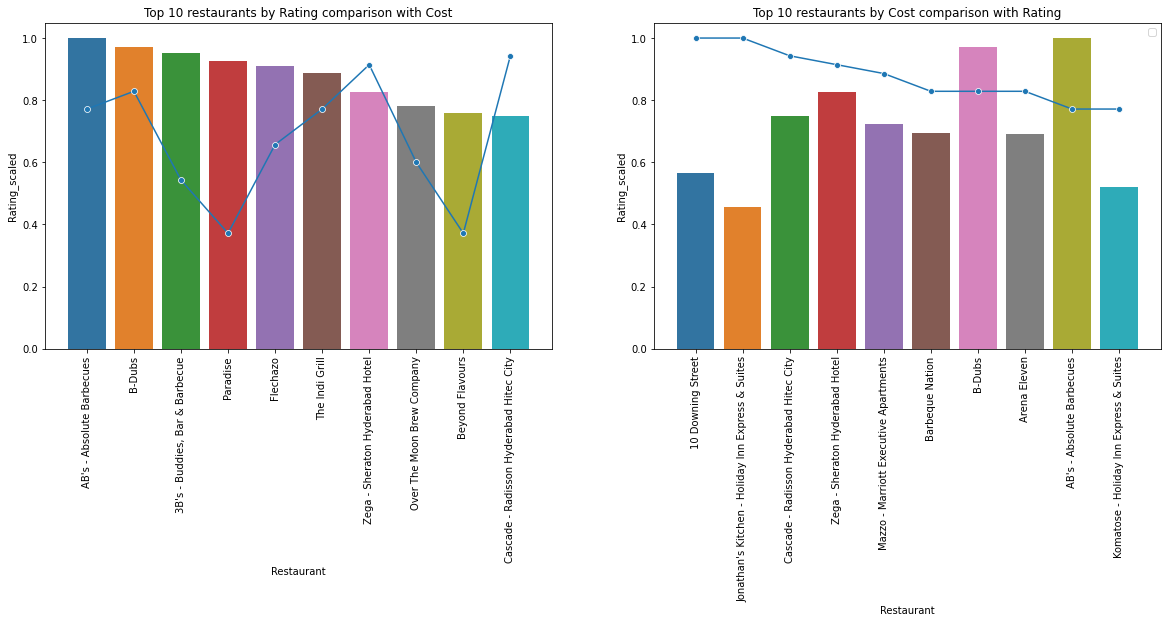

In [81]:
top_10_rating_df = restaurants_cost_rating.sort_values('Rating', ascending=False).head(10)
top_10_cost_df = restaurants_cost_rating.sort_values('Cost', ascending = False).head(10)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Rating_scaled',data = top_10_rating_df )
sns.lineplot(x='Restaurant',y='Cost_scaled',data= top_10_rating_df,marker='o')
plt.title('Top 10 restaurants by Rating comparison with Cost')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Rating_scaled',data = top_10_cost_df )
sns.lineplot(x='Restaurant',y='Cost_scaled',data= top_10_cost_df,marker='o')
plt.title('Top 10 restaurants by Cost comparison with Rating')
plt.legend()

Left graph has Ratings as a bar chart (descending order) with their respective Average cost as a lineplot. We can see that cost and rating are not exactly correlated. There are top rated restaurants with low average cost as well.

The right graph is sorted by cost in descending order. We have the top 10 expensive restaurants. We can see a similar trend here too. The rating don't follow the same trend as cost. There are expensive restaurants with lower average ratings than relatively cheaper restaurants.

#### Reviews dataset

In [82]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3.0,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2.0,3.0,2019-05-24,22,Friday,May,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,1.0,1.0,2019-05-24,22,Friday,May,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,3.0,2.0,2019-05-24,21,Friday,May,2019


**Percentage of restaurants with different ratings**

In [83]:
reviews_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

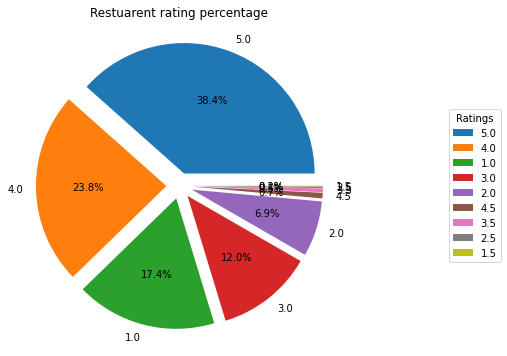

In [84]:
# plotting pie chart of percentage of bookings by hotel type
labels = reviews_df['Rating'].value_counts().index.tolist()
sizes = reviews_df['Rating'].value_counts().tolist()
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.legend(title = 'Ratings',bbox_to_anchor = (1.5,0.5), loc = "right")
plt.title("Restuarent rating percentage")
plt.show()

A large percentage of the restaurants have 5 rating followed by 4 and 1.

Text(0.5, 1.0, 'Top 15 Restaurants')

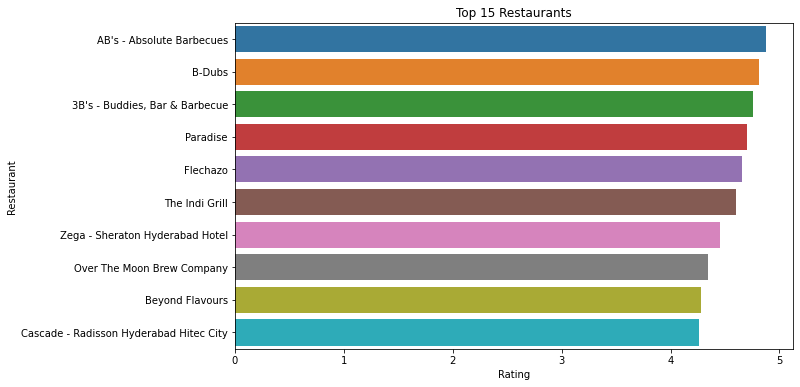

In [85]:
# average rating of restaurants sorted descending
top_restaurants_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
# plotting the top 10 restaurants by avg rating
plt.figure(figsize=(10,6))
sns.barplot(data= top_restaurants_rating.head(10), x='Rating', y='Restaurant')
plt.title('Top 15 Restaurants')

Top restaurants with the highest average rating.

**Restaurants reviews and ratings**

In [86]:
# total follower count for each restaurant
restaurant_followers_count = reviews_df.groupby(['Restaurant'])['no_of_followers'].sum().reset_index()
# total review count for each restaurant
restaurant_reviews_count = reviews_df.groupby(['Restaurant'])['no_of_reviews'].sum().reset_index()

In [87]:
restaurant_followers_count.head(2)

,Restaurant,no_of_followers
0,10 Downing Street,24573.0
1,13 Dhaba,8571.0


In [88]:
restaurant_reviews_count.head(2)

,Restaurant,no_of_reviews
0,10 Downing Street,3990.0
1,13 Dhaba,1770.0


In [89]:
restaurant_followers_reviews = restaurant_followers_count.merge(restaurant_reviews_count,on='Restaurant',how='left')

In [90]:
restaurant_followers_reviews.head(3)

,Restaurant,no_of_followers,no_of_reviews
0,10 Downing Street,24573.0,3990.0
1,13 Dhaba,8571.0,1770.0
2,"3B's - Buddies, Bar & Barbecue",1676.0,370.0


In [91]:
# no of followers and no of reviews are in different scales
# we can standardize them with minmaxscaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(restaurant_followers_reviews[['no_of_followers','no_of_reviews']])

restaurant_followers_reviews['Number_of_followers_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
restaurant_followers_reviews['Number_of_reviews_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

Text(0.5, 1.0, 'Top reviews count comparison with followers')

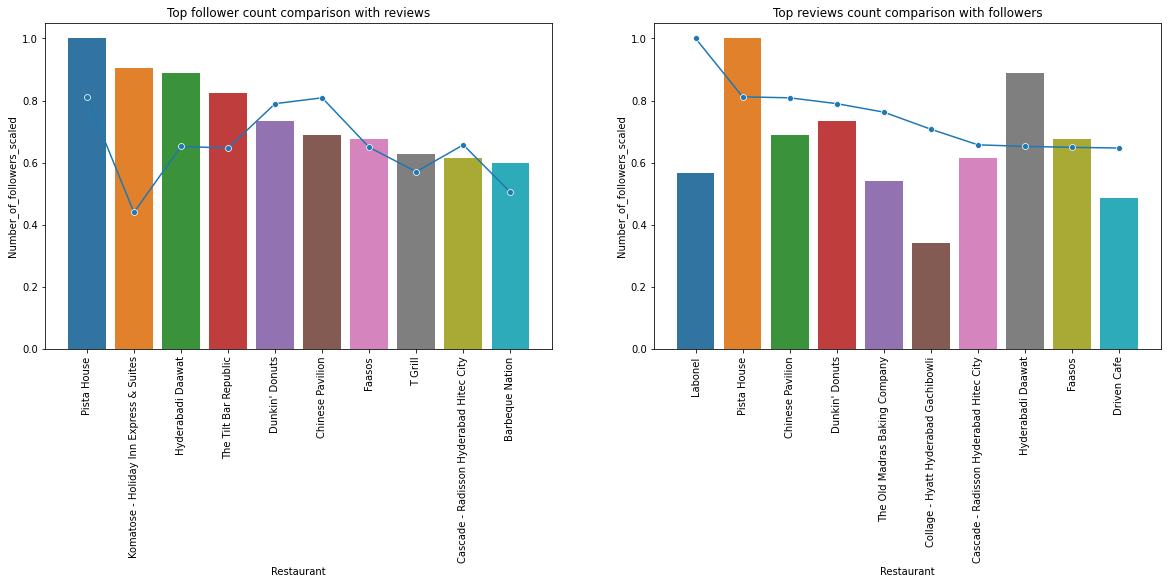

In [92]:
top10_followers = restaurant_followers_reviews.sort_values('no_of_followers', ascending = False).head(10)
top10_reviews = restaurant_followers_reviews.sort_values('no_of_reviews', ascending = False).head(10)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Number_of_followers_scaled',data = top10_followers )
sns.lineplot(x='Restaurant',y='Number_of_reviews_scaled',data= top10_followers,marker='o')
plt.title('Top follower count comparison with reviews')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Number_of_followers_scaled',data = top10_reviews )
sns.lineplot(x='Restaurant',y='Number_of_reviews_scaled',data= top10_reviews,marker='o')
plt.title('Top reviews count comparison with followers')

Left plot contains restaurants sorted by follower count compared with lineplot of review count. We can see that the average number of reviews are not exactly following the same trend. Similarly, in the right graph, you can see that it is sorted by average review count (lineplot) and the bar plots (average follower count) is not following the same trend.

**Good, Bad and Average Reviews**

In [93]:
reviews_eda = reviews_df.copy()

In [94]:
reviews_eda.head()

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3.0,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2.0,3.0,2019-05-24,22,Friday,May,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,1.0,1.0,2019-05-24,22,Friday,May,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,3.0,2.0,2019-05-24,21,Friday,May,2019


In [95]:
# creating new rating column categorising the ratings into 3 sentiment types: good, bad and average

def sentiment_rating(rating):
  # Classifying ratings of 1, 1.5, 2 as 0 (not good) and 4, 4.5, 5 as 1 (good) and 2.5, 3, 3.5 as 0.5 (average)
  if(rating == 1 or rating == 1.5 or rating == 2):
    bad = 0
    return bad
  elif(rating == 2.5 or rating == 3 or rating == 3.5):
    average = 0.5
    return average
  elif(rating == 4 or rating == 4.5 or rating == 5):
    good = 1
    return good

#applying above function
reviews_eda["rating_classification"] = reviews_eda["Rating"].apply(sentiment_rating)

In [96]:
# Classifying the reviews as good, bad and average based on the rating classification column
good = reviews_eda.loc[reviews_eda['rating_classification'] == 1,'Review']
bad = reviews_eda.loc[reviews_eda['rating_classification'] == 0,'Review']
average = reviews_eda.loc[reviews_eda['rating_classification'] == 0.5,'Review']

In [97]:
good.head()

0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
Name: Review, dtype: object

In [98]:
# create word cloud
from wordcloud import WordCloud
text1 = " ".join(good)
text2 = " ".join(bad)
text3 = " ".join(average)
word_cloud1 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'white').generate(text1)
word_cloud2 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'black').generate(text2)
word_cloud3 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'red').generate(text3)

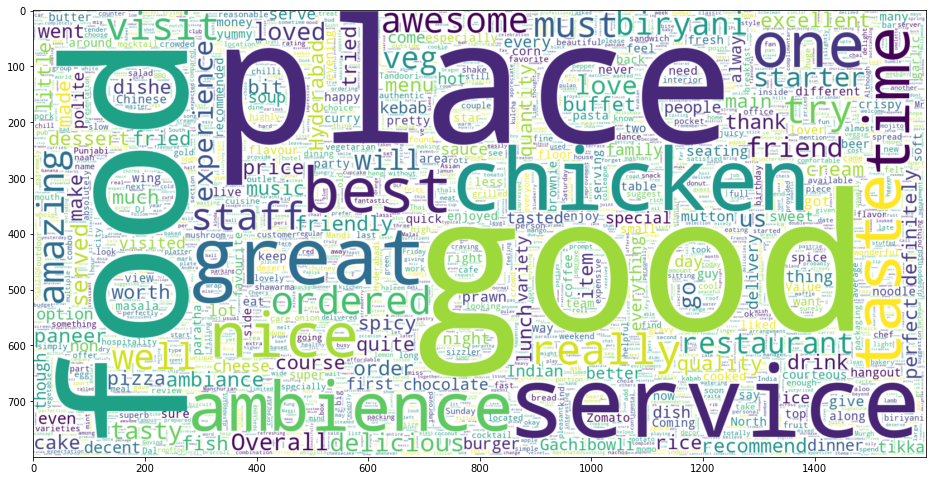

In [99]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud1,interpolation = 'bilinear')

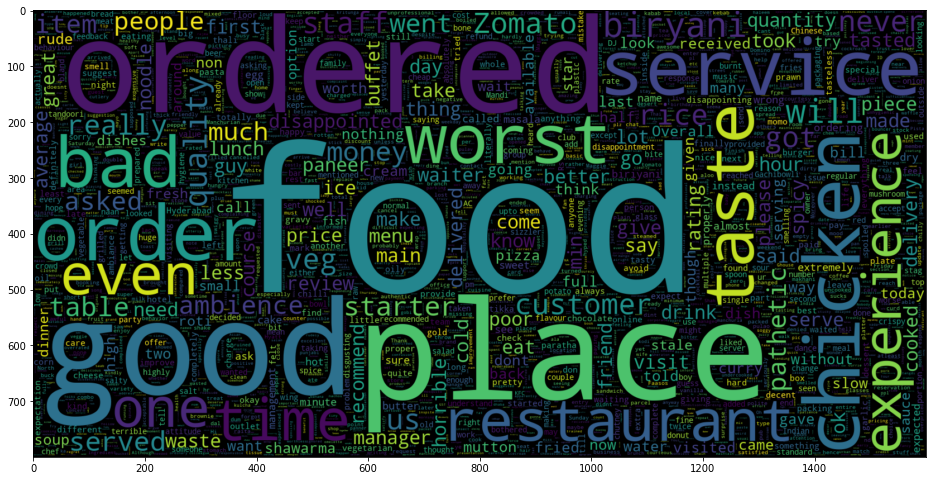

In [100]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud2,interpolation = 'bilinear')

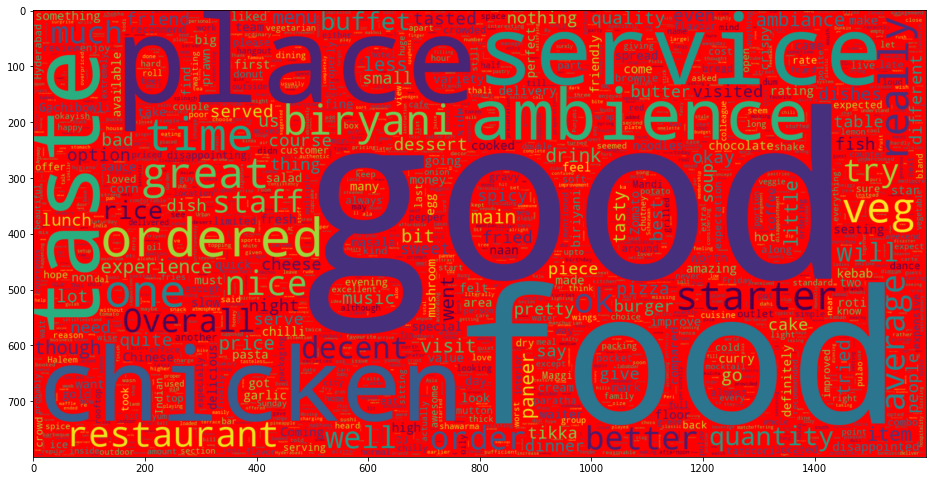

In [101]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud3,interpolation = 'bilinear')

### Feature Engineering

For clustering we are going to use the restaurant_df along with some information from the reviews_df.

**Extract Average Rating of restaurants**

In [102]:
restaurant_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2


In [103]:
top_restaurants_rating.head()

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.88
1,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
3,Paradise,4.70
4,Flechazo,4.66


This dataset has average rating information of each restaurant.

In [104]:
reviews_df.shape

(9954, 12)

We will create a new dataframe where the rating info (and other info from reviews df) is included with the restaurant df. 

In [105]:
# merging both datasets
restaurant_review_df = restaurant_df.merge(top_restaurants_rating, on = 'Restaurant', how = 'left')
# since we are including avg rating of restaurants, the column is renamed
restaurant_review_df.rename(columns={'Rating':'avg_rating'},inplace=True)
restaurant_review_df.head()

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length,avg_rating
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15,4.28
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2,4.70
2,Flechazo,1300.0,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts","[Asian, Mediterranean, North Indian, Desserts]",4,4,4.66
3,Shah Ghouse Hotel & Restaurant,800.0,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...","[Biryani, North Indian, Chinese, Seafood, Beve...",5,3,3.21
4,Over The Moon Brew Company,1200.0,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...","[Asian, Continental, North Indian, Chinese, Me...",5,13,4.34


**Extract number of reviews and followers**

We will also retrieve total followers and total reviews count from the reviews dataset and include them in restaurant review dataset.

In [106]:
reviews_df.head(2)

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3.0,2.0,2019-05-25,14,Saturday,May,2019


In [107]:
# total followers of each restaurant
total_followers = pd.DataFrame(reviews_df.groupby(['Restaurant'])['no_of_followers'].sum().reset_index())
# total reviews of each restaurant
total_reviews = pd.DataFrame(reviews_df.groupby(['Restaurant'])['no_of_reviews'].sum().reset_index())

In [108]:
total_followers.head(2)

,Restaurant,no_of_followers
0,10 Downing Street,24573.0
1,13 Dhaba,8571.0


In [109]:
# since we have added up the number of followers and reviews
# for each restaurant, we can rename columns accordingly
total_followers.rename(columns = {"no_of_followers":"total_followers"}, inplace = True)
total_reviews.rename(columns = {"no_of_reviews":"total_reviews"}, inplace = True)

In [110]:
# merge total reviews dataset with restaurant_review_df to include total reviews info
restaurant_review_df = restaurant_review_df.merge(total_reviews,on='Restaurant',how='left')
# include total followers info in restaurant_review_df
restaurant_review_df = restaurant_review_df.merge(total_followers,on='Restaurant',how='left')
restaurant_review_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length,avg_rating,total_reviews,total_followers
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15,4.28,752.0,10061.0
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2,4.70,252.0,798.0


**Splitting the dataframe to categorical and numerical data**

In [111]:
# the categorical data that we need
rest_text_df = restaurant_review_df[['Restaurant','Collections','Cuisines_list']]
# numerical data
rest_num_df = restaurant_review_df[['Cost','Collections_length','Total Cuisines','avg_rating','total_reviews','total_followers']]

There are some null values in Avg rating, total reviews and total followers.

In [112]:
rest_num_df.isnull().sum()

Cost                  0
Collections_length    0
Total Cuisines        0
avg_rating            5
total_reviews         5
total_followers       5
dtype: int64

In [113]:
restaurant_review_df[restaurant_review_df['avg_rating'].isna()]

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length,avg_rating,total_reviews,total_followers
98,IndiBlaze,600.0,unknown,"Fast Food, Salad","[Fast Food, Salad]",2,1,NaN,NaN,NaN
99,Sweet Basket,200.0,unknown,"Bakery, Mithai","[Bakery, Mithai]",2,1,NaN,NaN,NaN
100,Angaara Counts 3,500.0,unknown,"North Indian, Biryani, Chinese","[North Indian, Biryani, Chinese]",3,1,NaN,NaN,NaN
101,Wich Please,250.0,unknown,Fast Food,[Fast Food],1,1,NaN,NaN,NaN
102,Republic Of Noodles - Lemon Tree Hotel,1700.0,panasian delicaci,"Thai, Asian, Chinese, Malaysian","[Thai, Asian, Chinese, Malaysian]",4,2,NaN,NaN,NaN


These values are missing because these restaurant data is not present in the reviews df.

In [114]:
reviews_df[reviews_df['Restaurant'] == 'Angaara Counts 3']

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year


**Handling the null values**

We will use KNN Imputer to impute the missing values.

In [115]:
from sklearn.impute import KNNImputer
# imputer object
imputer = KNNImputer()

# Imputing missing values with KNN for the three columns
rest_num_df['avg_rating'] = imputer.fit_transform((rest_num_df['avg_rating'].values.reshape(-1,1)))
rest_num_df['total_reviews'] = imputer.fit_transform((rest_num_df['total_reviews'].values.reshape(-1,1)))
rest_num_df['total_followers'] = imputer.fit_transform((rest_num_df['total_followers'].values.reshape(-1,1)))

In [116]:
# # To check the outliers
# for col in rest_num_df.columns:
#   plt.figure(figsize=(10,6))
#   plt.boxplot(rest_num_df[col])
#   plt.title(col)

**Extracting Cuisines as features**

As the collections variable is missing ('unknown') for a lot (51%) of the restaurants, we won't extract features from it.

We will only use text data from cuisines column to extract features.

In [117]:
rest_text_df.head(3)

,Restaurant,Collections,Cuisines_list
0,Beyond Flavours,food hygien rate restaur hyderabad corpor favo...,"[Chinese, Continental, Kebab, European, South ..."
1,Paradise,hyderabad hottest,"[Biryani, North Indian, Chinese]"
2,Flechazo,great buffet hyderabad hottest,"[Asian, Mediterranean, North Indian, Desserts]"


In [118]:
rest_num_df.head(3)

,Cost,Collections_length,Total Cuisines,avg_rating,total_reviews,total_followers
0,800.0,15,6,4.28,752.0,10061.0
1,800.0,2,3,4.70,252.0,798.0
2,1300.0,4,4,4.66,667.0,2748.0


In [119]:
restaurant_review_df.head(3)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length,avg_rating,total_reviews,total_followers
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15,4.28,752.0,10061.0
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2,4.70,252.0,798.0
2,Flechazo,1300.0,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts","[Asian, Mediterranean, North Indian, Desserts]",4,4,4.66,667.0,2748.0


We can have a look at the cuisines before using text processing methods on the Cuisines column.

In [120]:
cuisine_list = []
# use restaurant df where we have a column of cuisines for each restaurant
for lists in rest_text_df['Cuisines_list']:
  for cuisine in lists:
    cuisine_list.append(cuisine)
# get unique cuisines
cuisine_set = set(cuisine_list)
cuisine_set

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

We can see there are some Cuisines with two word names (like South Indian, North Indian). TF-IDF vectorizer will separate them into different features (South, North and Indian) creating similarity between the two. We do not want that so hence we will convert them to single words (eg: SouthIndian).

In [121]:
def double_word_convertor(list_):
  '''
  Looks for cuisines with two word names and joins them
  '''
  list2 = []
  for elem in list_:
    # print(elem)
    cuisine_name = elem.split()
    cuisine_name = ''.join(cuisine_name)
    list2.append(cuisine_name)
  return list2

In [122]:
# modify double worded cuisine name
rest_text_df['Cuisines_list_mod'] = rest_text_df['Cuisines_list'].apply(double_word_convertor)

In [123]:
# checking if the double worded cuisine names are joined
cuisine_list = []
# use restaurant df where we have a column of cuisines for each restaurant
for lists in rest_text_df['Cuisines_list_mod']:
  for cuisine in lists:
    cuisine_list.append(cuisine)
# get unique cuisines
cuisine_set = set(cuisine_list)
# printing the last 20 cuisines
list(cuisine_set)[-12:]

['Spanish',
 'Kebab',
 'Wraps',
 'StreetFood',
 'Bakery',
 'Arabian',
 'Beverages',
 'NorthEastern',
 'Hyderabadi',
 'Momos',
 'Mexican',
 'Biryani']

In [124]:
# convert the lists into string
rest_text_df['Cuisines'] = rest_text_df['Cuisines_list_mod'].apply(lambda x: ' '.join(x))

In [125]:
rest_text_df.head(2)

,Restaurant,Collections,Cuisines_list,Cuisines_list_mod,Cuisines
0,Beyond Flavours,food hygien rate restaur hyderabad corpor favo...,"[Chinese, Continental, Kebab, European, South ...","[Chinese, Continental, Kebab, European, SouthI...",Chinese Continental Kebab European SouthIndian...
1,Paradise,hyderabad hottest,"[Biryani, North Indian, Chinese]","[Biryani, NorthIndian, Chinese]",Biryani NorthIndian Chinese


In [126]:
# converting the text to lowercase
rest_text_df['Cuisines'] = rest_text_df['Cuisines'].apply(lambda x: x.lower())
# rest_text_df['Cuisines'] = rest_text_df['Cuisines'].apply(remove_punctuation)
# rest_text_df['Cuisines'] = rest_text_df['Cuisines'].apply(remove_stopwords)
# rest_text_df['Cuisines'] = rest_text_df['Cuisines'].apply(stemming)

In [127]:
rest_text_df.head(3)

,Restaurant,Collections,Cuisines_list,Cuisines_list_mod,Cuisines
0,Beyond Flavours,food hygien rate restaur hyderabad corpor favo...,"[Chinese, Continental, Kebab, European, South ...","[Chinese, Continental, Kebab, European, SouthI...",chinese continental kebab european southindian...
1,Paradise,hyderabad hottest,"[Biryani, North Indian, Chinese]","[Biryani, NorthIndian, Chinese]",biryani northindian chinese
2,Flechazo,great buffet hyderabad hottest,"[Asian, Mediterranean, North Indian, Desserts]","[Asian, Mediterranean, NorthIndian, Desserts]",asian mediterranean northindian desserts


In [128]:
# tfid vectorizer object
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data  
tfidf_collection_matrix = tfid_vectorizer.fit_transform(rest_text_df['Cuisines'])

In [129]:
feature_names = tfid_vectorizer.get_feature_names()

collection_vectorized_df = pd.DataFrame(tfidf_collection_matrix.todense(), columns = feature_names)
collection_vectorized_df.head()

,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.208607,0.0,0.0,0.000000,0.454591,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.756722,0.0,0.0,...,0.412797,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.506128,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.258260,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.574799,0.419418,0.0,0.0,...,0.228795,0.0,0.0,0.602001,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.495494,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.252833,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [130]:
restaurant_tfidf_df = pd.concat([rest_num_df, collection_vectorized_df], axis = 1)
restaurant_tfidf_df.head()

,Cost,Collections_length,Total Cuisines,avg_rating,total_reviews,total_followers,american,andhra,arabian,asian,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,800.0,15,6,4.28,752.0,10061.0,0.0,0.0,0.0,0.000000,...,0.208607,0.0,0.0,0.000000,0.454591,0.0,0.0,0.0,0.0,0.0
1,800.0,2,3,4.70,252.0,798.0,0.0,0.0,0.0,0.000000,...,0.412797,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,1300.0,4,4,4.66,667.0,2748.0,0.0,0.0,0.0,0.506128,...,0.258260,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,800.0,3,5,3.21,1433.0,11843.0,0.0,0.0,0.0,0.000000,...,0.228795,0.0,0.0,0.602001,0.000000,0.0,0.0,0.0,0.0,0.0
4,1200.0,13,5,4.34,1831.0,7010.0,0.0,0.0,0.0,0.495494,...,0.252833,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
